# Missing Value Treatment

In [1]:
import os
os.chdir(r'D:\D\Cognitior\Courses\Dataset\Python DataScience')
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_excel('Employee_Data.xls')

In [4]:
dataset.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

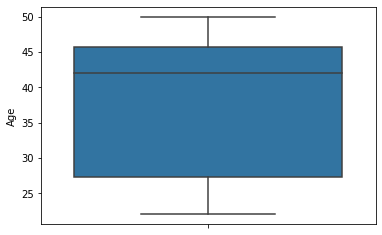

In [5]:
sns.boxplot(y='Age',data=dataset)

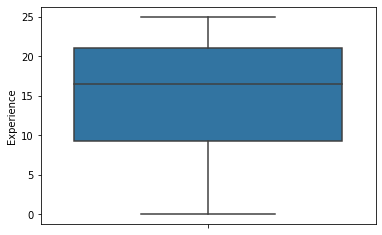

In [6]:
sns.boxplot(y='Experience', data=dataset)

In [22]:
x=dataset.iloc[:,3:6].values

In [23]:
x

array([['Sales and Marketing', 28.0, 3.0],
       ['Sales and Marketing', 22.0, 1.0],
       ['Customer Relations', 22.0, 1.0],
       ['Customer Relations', 22.0, 1.0],
       ['Accounting', 27.0, 0.0],
       ['Accounting', 26.0, 5.0],
       ['Customer Relations', 24.0, 6.0],
       ['Customer Relations', 29.0, 2.0],
       ['Sales and Marketing', 29.0, 5.0],
       ['Customer Relations', 30.0, 6.0],
       ['Accounting', 26.0, 5.0],
       ['Sales and Marketing', 26.0, 6.0],
       ['Accounting', 24.0, 5.0],
       ['Accounting', 22.0, 2.0],
       ['Sales and Marketing', 25.0, 3.0],
       ['Accounting', 25.0, nan],
       ['Customer Relations', 22.0, nan],
       ['Accounting', 25.0, nan],
       ['Accounting', 27.0, nan],
       [nan, 25.0, nan],
       [nan, 22.0, nan],
       [nan, 22.0, nan],
       [nan, 24.0, nan],
       [nan, 27.0, nan],
       [nan, 22.0, nan],
       [nan, 33.0, 13.0],
       [nan, 36.0, 7.0],
       [nan, 35.0, 10.0],
       [nan, 33.0, 12.0],
       [

In [29]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer( strategy = 'most_frequent')
x[:,0:1] = imp.fit_transform(x[:,0:1])

In [33]:
x

array([['Sales and Marketing', 28.0, 3.0],
       ['Sales and Marketing', 22.0, 1.0],
       ['Customer Relations', 22.0, 1.0],
       ['Customer Relations', 22.0, 1.0],
       ['Accounting', 27.0, 0.0],
       ['Accounting', 26.0, 5.0],
       ['Customer Relations', 24.0, 6.0],
       ['Customer Relations', 29.0, 2.0],
       ['Sales and Marketing', 29.0, 5.0],
       ['Customer Relations', 30.0, 6.0],
       ['Accounting', 26.0, 5.0],
       ['Sales and Marketing', 26.0, 6.0],
       ['Accounting', 24.0, 5.0],
       ['Accounting', 22.0, 2.0],
       ['Sales and Marketing', 25.0, 3.0],
       ['Accounting', 25.0, nan],
       ['Customer Relations', 22.0, nan],
       ['Accounting', 25.0, nan],
       ['Accounting', 27.0, nan],
       ['Sales and Marketing', 25.0, nan],
       ['Sales and Marketing', 22.0, nan],
       ['Sales and Marketing', 22.0, nan],
       ['Sales and Marketing', 24.0, nan],
       ['Sales and Marketing', 27.0, nan],
       ['Sales and Marketing', 22.0, nan],
   

In [34]:
from sklearn.impute import SimpleImputer
imp =SimpleImputer( strategy = 'mean')
x[:,1:3] = imp.fit_transform(x[:,1:3])

In [39]:
x

array([['Sales and Marketing', 28.0, 3.0],
       ['Sales and Marketing', 22.0, 1.0],
       ['Customer Relations', 22.0, 1.0],
       ['Customer Relations', 22.0, 1.0],
       ['Accounting', 27.0, 0.0],
       ['Accounting', 26.0, 5.0],
       ['Customer Relations', 24.0, 6.0],
       ['Customer Relations', 29.0, 2.0],
       ['Sales and Marketing', 29.0, 5.0],
       ['Customer Relations', 30.0, 6.0],
       ['Accounting', 26.0, 5.0],
       ['Sales and Marketing', 26.0, 6.0],
       ['Accounting', 24.0, 5.0],
       ['Accounting', 22.0, 2.0],
       ['Sales and Marketing', 25.0, 3.0],
       ['Accounting', 25.0, 14.766666666666667],
       ['Customer Relations', 22.0, 14.766666666666667],
       ['Accounting', 25.0, 14.766666666666667],
       ['Accounting', 27.0, 14.766666666666667],
       ['Sales and Marketing', 25.0, 14.766666666666667],
       ['Sales and Marketing', 22.0, 14.766666666666667],
       ['Sales and Marketing', 22.0, 14.766666666666667],
       ['Sales and Marketin

In [51]:
pd.DataFrame(x)

0   1   2
0   Sales and Marketing  28   3
1   Sales and Marketing  22   1
2    Customer Relations  22   1
3    Customer Relations  22   1
4            Accounting  27   0
..                  ...  ..  ..
95  Sales and Marketing  47  22
96  Sales and Marketing  46  20
97   Customer Relations  44  18
98   Customer Relations  47  22
99           Accounting  44  21

[100 rows x 3 columns]

In [49]:
dataset.isnull().sum()

Employee Id    0
First Name     0
Last Name      0
Department     0
Age            0
Experience     0
Salary         0
dtype: int64

In [42]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

In [44]:
dataset['Experience'] = dataset['Experience'].fillna(dataset['Experience'].median())

In [48]:
dataset.groupby('Department').size()

Department
Accounting             27
Customer Relations     24
Sales and Marketing    49
dtype: int64

In [47]:
dataset['Department'] = dataset['Department'].fillna('Sales and Marketing')

# Outlier Treatment

In [52]:
os.chdir(r'D:\D\Cognitior\Courses\Data Science - Course - Reusable component\Outlier Treatment')

In [54]:
dataset_ot = pd.read_excel('OutlierData.xlsx')

In [55]:
dataset_ot

Department  Age  Experience
0         HR   21           1
1         HR   33          12
2         IT   35          12
3         IT   36          12
4         HR   34          11
5         IT   33          13
6  Marketing   34          12
7         HR   32          10
8  Marketing   31           2
9         IT   55          35

In [56]:
Q1 = dataset_ot.quantile(0.25)
Q3 = dataset_ot.quantile(0.75)

In [57]:
Q1

Age           32.25
Experience    10.25
Name: 0.25, dtype: float64

In [58]:
Q3

Age           34.75
Experience    12.00
Name: 0.75, dtype: float64

In [59]:
IQR = Q3-Q1

In [64]:
IQR

Age           2.50
Experience    1.75
dtype: float64

In [62]:
dataset_ot[~((dataset_ot<(Q1-1.5*IQR))|
             (dataset_ot>(Q3 + 1.5*IQR))).any(axis=1)]

Department  Age  Experience
1         HR   33          12
2         IT   35          12
3         IT   36          12
4         HR   34          11
5         IT   33          13
6  Marketing   34          12
7         HR   32          10

# Feature Scaling

In [65]:
os.chdir(r'D:\D\Trainings\R and Python Classes\Machine Learning A-Z\Part 1 - Data Preprocessing\Section 2 -------------------- Part 1 - Data Preprocessing --------------------\Data_Preprocessing')

In [66]:
dataset_fs = pd.read_csv('data.csv')

In [69]:
x=dataset_fs.iloc[:].values

In [72]:
x

array([['France', 44, 72000, 'No'],
       ['Spain', 27, 48000, 'Yes'],
       ['Germany', 30, 54000, 'No'],
       ['Spain', 45, 61000, 'No'],
       ['Germany', 40, 45000, 'Yes'],
       ['France', 35, 58000, 'Yes'],
       ['Spain', 39, 52000, 'No'],
       ['France', 48, 79000, 'Yes'],
       ['Germany', 50, 83000, 'No'],
       ['France', 37, 67000, 'Yes']], dtype=object)

In [73]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x[:,1:3] = sc_x.fit_transform(x[:,1:3])

In [74]:
x

array([['France', 0.6322994279878491, 0.8189757526634036, 'No'],
       ['Spain', -1.7563872999662475, -1.1271052437644862, 'Yes'],
       ['Germany', -1.334854347974348, -0.6405849946575137, 'No'],
       ['Spain', 0.7728104119851489, -0.07297803736604587, 'No'],
       ['Germany', 0.0702554919986499, -1.3703653683179724, 'Yes'],
       ['France', -0.6322994279878491, -0.3162381619195321, 'Yes'],
       ['Spain', -0.0702554919986499, -0.8027584110265045, 'No'],
       ['France', 1.1943433639770482, 1.3865827099548713, 'Yes'],
       ['Germany', 1.475365331971648, 1.710929542692853, 'No'],
       ['France', -0.3512774599932495, 0.41354221174092654, 'Yes']],
      dtype=object)

In [ ]:
from sklearn.preprocessing import Normalizer
nm_x = Normalizer()
x[:,1:3] = nm_x.fit_transform(x[:,1:3])

# Encoding

In [78]:
x

array([['France', 0.6322994279878491, 0.8189757526634036, 'No'],
       ['Spain', -1.7563872999662475, -1.1271052437644862, 'Yes'],
       ['Germany', -1.334854347974348, -0.6405849946575137, 'No'],
       ['Spain', 0.7728104119851489, -0.07297803736604587, 'No'],
       ['Germany', 0.0702554919986499, -1.3703653683179724, 'Yes'],
       ['France', -0.6322994279878491, -0.3162381619195321, 'Yes'],
       ['Spain', -0.0702554919986499, -0.8027584110265045, 'No'],
       ['France', 1.1943433639770482, 1.3865827099548713, 'Yes'],
       ['Germany', 1.475365331971648, 1.710929542692853, 'No'],
       ['France', -0.3512774599932495, 0.41354221174092654, 'Yes']],
      dtype=object)

In [81]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
x[:,0] = labelencoder_x.fit_transform(x[:,0])
x[:,3] = labelencoder_x.fit_transform(x[:,3])

In [83]:
onehotencoder = OneHotEncoder(categorical_features=[0])
x = onehotencoder.fit_transform(x).toarray()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [84]:
pd.DataFrame(x)

0    1    2         3         4    5
0  1.0  0.0  0.0  0.632299  0.818976  0.0
1  0.0  0.0  1.0 -1.756387 -1.127105  1.0
2  0.0  1.0  0.0 -1.334854 -0.640585  0.0
3  0.0  0.0  1.0  0.772810 -0.072978  0.0
4  0.0  1.0  0.0  0.070255 -1.370365  1.0
5  1.0  0.0  0.0 -0.632299 -0.316238  1.0
6  0.0  0.0  1.0 -0.070255 -0.802758  0.0
7  1.0  0.0  0.0  1.194343  1.386583  1.0
8  0.0  1.0  0.0  1.475365  1.710930  0.0
9  1.0  0.0  0.0 -0.351277  0.413542  1.0

# Simple Linear Regression

In [85]:
os.chdir(r'D:\D\Edureka\Edureka - 24 June - Python\Class 9')

In [87]:
dataset=pd.read_csv('Salary_Data.csv')

In [91]:
x=dataset.iloc[:,0:1].values

In [95]:
y = dataset.iloc[:,1].values

In [96]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,
                                                   random_state=10)

In [118]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
regressor.coef_

array([9303.95933197])

In [120]:
regressor.intercept_

27206.42890292858

In [ ]:
salary = 9303*Exp + 27206

In [123]:
y_pred=regressor.predict(x_test)

In [122]:
y_test

array([ 91738.,  54445.,  56642.,  37731.,  43525.,  98273.,  57081.,
       112635.,  56957.])

In [124]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9647278344670828

In [125]:
x_new = pd.read_excel('new.xlsx')

In [130]:
x_new = x_new.iloc[:,0:1].values

In [131]:
regressor.predict(x_new)

array([ 45814.34756686,  55118.30689883,  64422.2662308 ,  64422.2662308 ,
        73726.22556276,  27206.42890293, 166765.81888243])